# ATP Tennis Data - Player Diff Stats




# Summary of Results




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper, RSTATE, N_JOBS, MAX_ITER, LABEL_COL
import util.model_util as mu
import logging
import importlib

logging.basicConfig(level=logging.INFO)
%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d %H:%m'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "raw1985"


# sometimes I run these notebooks via command line. Environment variable is set so we know whether we are in DEBUG mode or not
# if you want to manually run this in DEBUG mode, change default value to True
DEBUG = bool(os.environ.get("IPYNB_DEBUG", False))

if DEBUG:
    DESCRIPTION = f"{DESCRIPTION}-test"
    FEATURE_FILE = '../datasets/atp_matches_1985-2019_features_test-raw_diff-ohe-history-matchup-stats.csv'
    ModelWrapper.REPORT_FILE = '../reports/summary-test.csv'
else:
    FEATURE_FILE = '../datasets/atp_matches_1985-2019_features-raw_diff-ohe-history-matchup-stats.csv'




START_YEAR = 1985
END_YEAR = 2018


column_filters = ["util.model_util.BaseRawFilter"]

In [2]:
X_train, X_test, y_train, y_test = ModelWrapper.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR, column_filters = column_filters)
print(f'Final columns: {X_test.columns}')

INFO:util.model_util:loading ../datasets/atp_matches_1985-2019_features-raw_diff-ohe-history-matchup-stats.csv
INFO:util.model_util:Shape before filtering: (99901, 5459)
INFO:util.model_util:Adding filter: util.model_util.BaseRawFilter
INFO:util.model_util:Shape after filtering: (99901, 13)
INFO:util.model_util:Final Features shape: (99901, 13)


Final columns: Index(['draw_size', 'round_label', 'tourney_level_label', 'tourney_month',
       'tourney_year', 'p1_age', 'p1_ht', 'p1_rank', 'p1_seed', 'p2_age',
       'p2_ht', 'p2_rank', 'p2_seed'],
      dtype='object')


# Get our baseline

If we really don't know anything about tennis, then a reasonable way of predicting wins/losses would be by player rank. If we look at our dataset, the accuracy of using this method for prediction would be the baseline accuracy for our model:

If player 1 rank < player 2 rank, then label == 1 (win)
If player 2 rank < player 1 rank, then label == 0 (loss)
Sum these two numbers and divide by total samples would give us the baseline accuracy


In [3]:
tests = pd.concat([X_test, y_test], axis=1)
p1_wins = tests[(tests.p1_rank < tests.p2_rank) & (tests.p1_winner == 1)]
p2_losses = tests[(tests.p2_rank < tests.p1_rank) & (tests.p1_winner == 0)]
baseline_accuracy = (len(p1_wins) + len(p2_losses))/ len(tests)
print(f'Our baseline accuracy should be: {baseline_accuracy}')

Our baseline accuracy should be: 0.6529067905188981


# Run all Models

In [4]:
models = [
    LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
    KNeighborsClassifier(n_jobs = N_JOBS),
    DecisionTreeClassifier(random_state = RSTATE),
    RandomForestClassifier(random_state=RSTATE, verbose=1),
    GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
    AdaBoostClassifier(random_state=RSTATE),
]

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)




Running LogisticRegression
[LibLinear]

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Model Score: 0.6533872517616912

ROC/AUC Score: 0.653402887103057
              precision    recall  f1-score   support

        Loss       0.66      0.65      0.65     12522
         Win       0.65      0.66      0.65     12454

    accuracy                           0.65     24976
   macro avg       0.65      0.65      0.65     24976
weighted avg       0.65      0.65      0.65     24976

      Loss   Win
Loss  8110  4412
Win   4245  8209


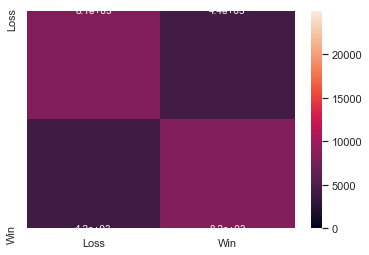

INFO:util.model_util:Saving model file: ../models/logisticregression-1985-2018-raw1985.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


Running KNeighborsClassifier
Model Score: 0.6016175528507367

ROC/AUC Score: 0.6016169979891116
              precision    recall  f1-score   support

        Loss       0.60      0.60      0.60     12522
         Win       0.60      0.60      0.60     12454

    accuracy                           0.60     24976
   macro avg       0.60      0.60      0.60     24976
weighted avg       0.60      0.60      0.60     24976

      Loss   Win
Loss  7536  4986
Win   4964  7490


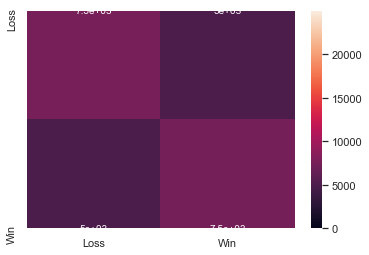

INFO:util.model_util:Saving model file: ../models/kneighborsclassifier-1985-2018-raw1985.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


Running DecisionTreeClassifier
Model Score: 0.5763532991672005

ROC/AUC Score: 0.5763541921798172
              precision    recall  f1-score   support

        Loss       0.58      0.58      0.58     12522
         Win       0.57      0.58      0.58     12454

    accuracy                           0.58     24976
   macro avg       0.58      0.58      0.58     24976
weighted avg       0.58      0.58      0.58     24976

      Loss   Win
Loss  7213  5309
Win   5272  7182


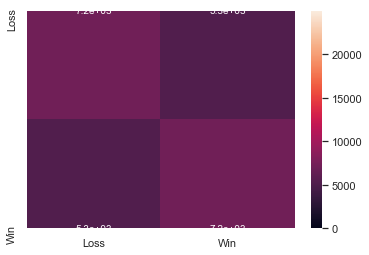

INFO:util.model_util:Saving model file: ../models/decisiontreeclassifier-1985-2018-raw1985.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


Running RandomForestClassifier


/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


Model Score: 0.6237588084561179

ROC/AUC Score: 0.6235599105009901
              precision    recall  f1-score   support

        Loss       0.61      0.70      0.65     12522
         Win       0.64      0.55      0.59     12454

    accuracy                           0.62     24976
   macro avg       0.63      0.62      0.62     24976
weighted avg       0.63      0.62      0.62     24976

      Loss   Win
Loss  8723  3799
Win   5598  6856


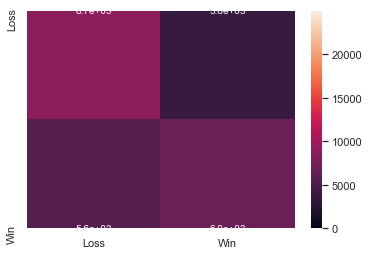

INFO:util.model_util:Saving model file: ../models/randomforestclassifier-1985-2018-raw1985.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


Running GradientBoostingClassifier
      Iter       Train Loss   Remaining Time 
         1           1.3669            4.42s
         2           1.3509            4.19s
         3           1.3368            4.17s
         4           1.3251            4.02s
         5           1.3144            4.01s
         6           1.3054            3.98s
         7           1.2982            3.93s
         8           1.2911            3.87s
         9           1.2850            3.83s
        10           1.2797            3.78s
        20           1.2495            3.28s
        30           1.2323            2.74s
        40           1.2219            2.27s
        50           1.2137            1.85s
        60           1.2049            1.47s
        70           1.2006            1.08s
        80           1.1957            0.71s
        90           1.1910            0.36s
       100           1.1859            0.00s
Model Score: 0.670723894

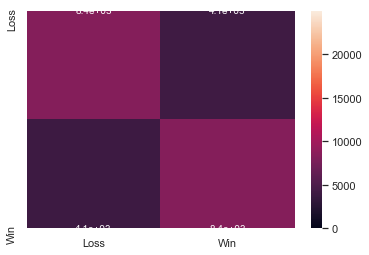

INFO:util.model_util:Saving model file: ../models/gradientboostingclassifier-1985-2018-raw1985.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


Running AdaBoostClassifier
Model Score: 0.6567504804612428

ROC/AUC Score: 0.656791867094386
              precision    recall  f1-score   support

        Loss       0.66      0.64      0.65     12522
         Win       0.65      0.67      0.66     12454

    accuracy                           0.66     24976
   macro avg       0.66      0.66      0.66     24976
weighted avg       0.66      0.66      0.66     24976

      Loss   Win
Loss  8034  4488
Win   4085  8369


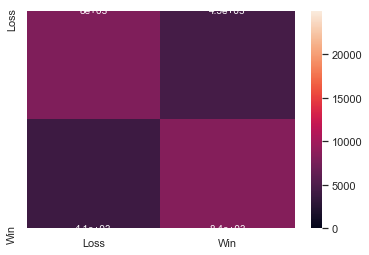

INFO:util.model_util:Saving model file: ../models/adaboostclassifier-1985-2018-raw1985.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


In [5]:
for model in models:
    print(f'\n\nRunning {type(model).__name__}')
    mw = mu.ModelWrapper(model,
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                    column_filters = column_filters)
    mw.fit(X_train, y_train)
    predict = mw.predict(X_test)
    mw.analyze(y_test)
    plt.show()
    mw.save()

# Summary

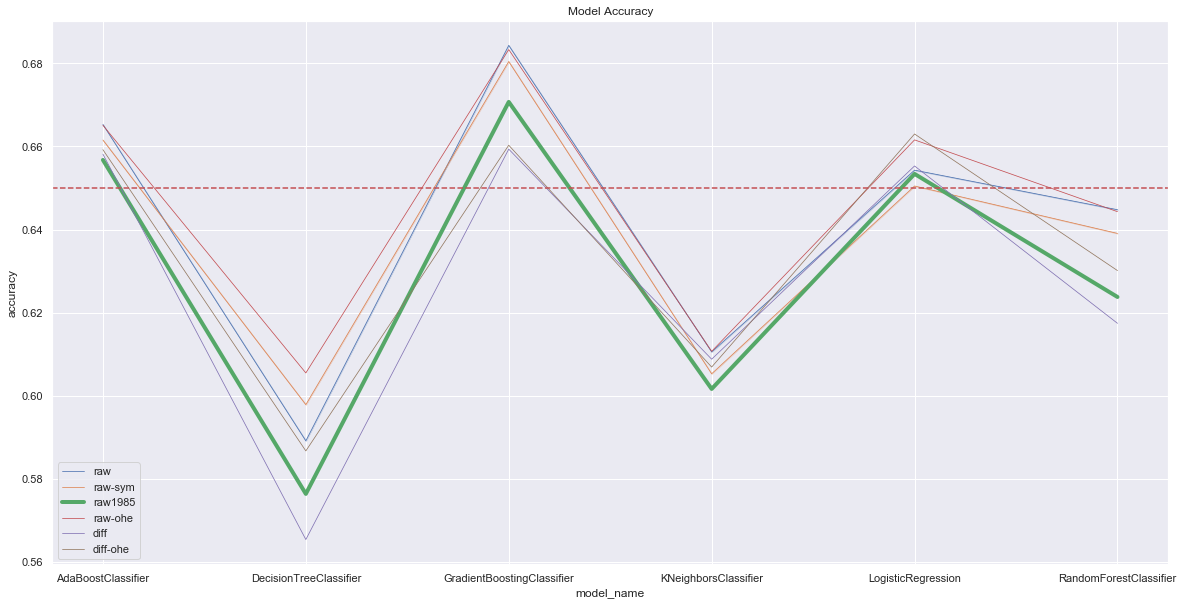

In [6]:
report = pd.read_csv(ModelWrapper.REPORT_FILE)

f, a = plt.subplots(1, 1, figsize=(20, 10))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    if desc == DESCRIPTION:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=4)
    else:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=0.75)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")
_ = a.legend(loc="lower left")

Best Model: GradientBoostingClassifier


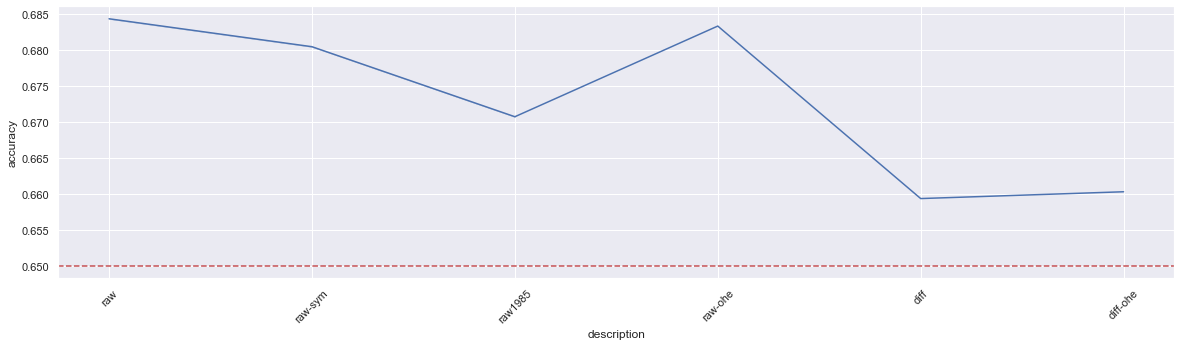

In [7]:
best_model = report.loc[report[report.description == DESCRIPTION].accuracy.idxmax()].model_name
print(f'Best Model: {best_model}')

dt_report = report[(report.model_name == 'GradientBoostingClassifier')]

f, a = plt.subplots(1, 1, figsize=(20, 5))
_ = sns.lineplot(x="description", y="accuracy", data=dt_report, ax=a, sort=False)
_ = a.axhline(0.65, ls='--', color='r')
_ = a.set_label(f"{best_model} Accuracy")
_ = plt.xticks(rotation=45)


In [8]:
print(f'Last Finished: {datetime.now().strftime(DATE_FORMAT)}')

Last Finished: 2019-10-28 14:10
